In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_excel("digits.xlsx")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1797 non-null   int64
 1   1       1797 non-null   int64
 2   2       1797 non-null   int64
 3   3       1797 non-null   int64
 4   4       1797 non-null   int64
 5   5       1797 non-null   int64
 6   6       1797 non-null   int64
 7   7       1797 non-null   int64
 8   8       1797 non-null   int64
 9   9       1797 non-null   int64
 10  10      1797 non-null   int64
 11  11      1797 non-null   int64
 12  12      1797 non-null   int64
 13  13      1797 non-null   int64
 14  14      1797 non-null   int64
 15  15      1797 non-null   int64
 16  16      1797 non-null   int64
 17  17      1797 non-null   int64
 18  18      1797 non-null   int64
 19  19      1797 non-null   int64
 20  20      1797 non-null   int64
 21  21      1797 non-null   int64
 22  22      1797 non-null   int64
 23  23      1797 

In [14]:
x=df.drop('number',axis=1)
y=df['number']

In [15]:
x.iloc[1]

0      0
1      0
2      0
3     12
4     13
      ..
59    11
60    16
61    10
62     0
63     0
Name: 1, Length: 64, dtype: int64

In [17]:
x.iloc[0].values.reshape(8,8)

array([[ 0,  0,  5, 13,  9,  1,  0,  0],
       [ 0,  0, 13, 15, 10, 15,  5,  0],
       [ 0,  3, 15,  2,  0, 11,  8,  0],
       [ 0,  4, 12,  0,  0,  8,  8,  0],
       [ 0,  5,  8,  0,  0,  9,  8,  0],
       [ 0,  4, 11,  0,  1, 12,  7,  0],
       [ 0,  2, 14,  5, 10, 12,  0,  0],
       [ 0,  0,  6, 13, 10,  0,  0,  0]], dtype=int64)

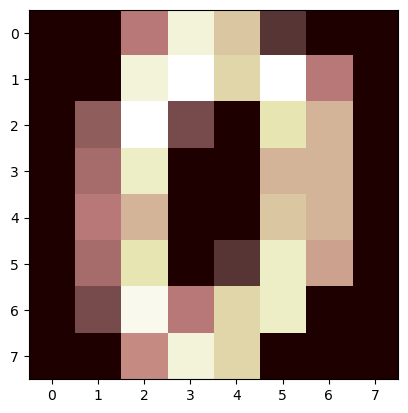

In [18]:
plt.imshow(x.iloc[0].values.reshape(8,8),cmap='pink')

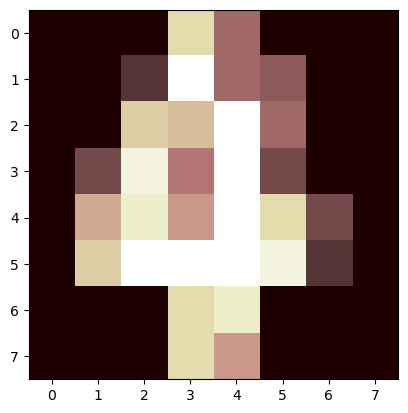

In [22]:
#text detection
plt.imshow(x.iloc[400].values.reshape(8,8),cmap='pink')

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,number
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


<Axes: xlabel='number'>

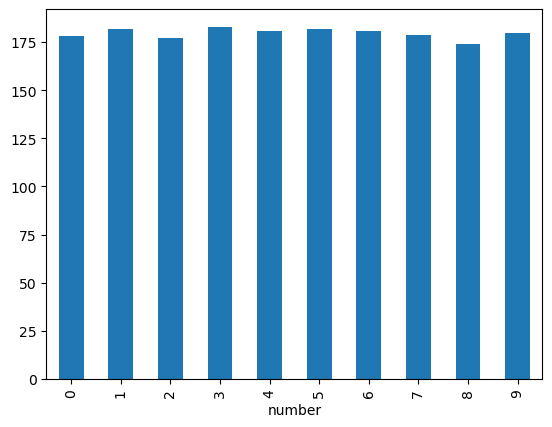

In [24]:
df['number'].value_counts().sort_index().plot(kind='bar')

In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [26]:
x=ss.fit_transform(x)

In [28]:
from sklearn.manifold import TSNE

In [33]:
tsne=TSNE(n_components=2,random_state=100)

In [34]:
x_tsne=tsne.fit_transform(x)

In [35]:
x_tsne=pd.DataFrame(x_tsne,columns=['col1','col2'])

In [ ]:
#KL divergence-Kullback leibler divergence
x_tsne

,col1,col2
0,-38.947693,-31.381340
1,-15.235722,-2.561935
2,5.972243,-14.772263
3,29.280766,2.100042
4,-36.398155,2.855378
...,...,...
1792,37.128078,18.470131
1793,-31.144924,-26.194273
1794,2.261562,-4.905307
1795,36.930031,16.343740


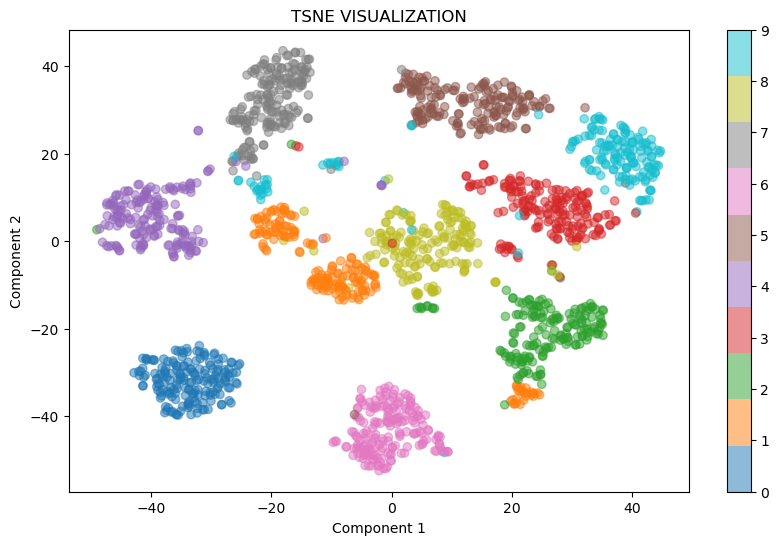

In [50]:
#with tsne we transformed the 64 dimensions(columns) into just 2 columns and then we created the scatter plot to visualize.
#the clear difference between the no is visible so we can precisely predict.
#So tsne is a method to understand(visualize) higher dimensional data.
plt.figure(figsize=(10,6))
plt.title("TSNE VISUALIZATION")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
scatter=plt.scatter(x_tsne['col1'],x_tsne['col2'],c=y,cmap='tab10',alpha=0.5)
plt.colorbar(scatter,ticks=range(10))
plt.show()

In [51]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [55]:
#trying logistic regression in this dataset with all 64 columns(dimensions).
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

#training of data
lr.fit(x_train,y_train)
y_pred_test_logistic=lr.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_pred_test_logistic,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.95      0.97      0.96        40
           2       0.97      1.00      0.99        34
           3       0.95      1.00      0.97        38
           4       0.94      1.00      0.97        33
           5       0.95      0.93      0.94        42
           6       1.00      0.96      0.98        24
           7       1.00      0.98      0.99        44
           8       0.97      0.91      0.94        33
           9       0.97      0.97      0.97        32

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [87]:
from sklearn.decomposition import PCA
pca=PCA(n_components=64)

In [88]:
x_pca=pca.fit_transform(x)

In [89]:
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-1.914214,-0.954502,-3.946035,-2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,...,0.217284,0.184659,0.152393,-0.486203,-0.009390,0.009188,-0.027512,0.0,-4.777481e-16,-1.779018e-16
1,-0.588980,0.924636,3.924755,1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,...,0.005322,-0.267950,0.511874,0.422479,0.090586,-0.127878,-0.103101,0.0,-1.145740e-15,2.809020e-16
2,-1.302039,-0.317189,3.023333,2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,...,0.178624,-0.067011,-0.112209,-0.034327,-0.444446,0.518823,0.179429,0.0,-9.630504e-16,2.439277e-16
3,3.020770,-0.868772,-0.801744,2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,...,-0.115443,-0.264125,-0.018912,0.153687,-0.275277,0.115922,0.101748,0.0,1.623777e-15,-4.514341e-17
4,-4.528949,-1.093480,0.973121,1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,...,-0.335099,0.098695,-0.292078,-0.157340,0.122873,0.084901,-0.072045,0.0,1.361248e-16,2.939400e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-0.104331,0.255024,-3.765861,1.947006,-0.190094,-0.555760,0.531222,0.476475,1.152430,-0.473054,...,-0.172645,0.255690,0.041558,0.301991,0.041755,-0.009942,0.111765,0.0,-2.193766e-16,1.010091e-16
1793,-2.423234,-1.429611,-3.045245,-2.632089,-0.822902,0.004061,-1.106872,2.330903,0.569455,-1.654173,...,-0.186876,0.424451,0.249359,0.183744,-0.422494,-0.374617,-0.138655,0.0,1.214236e-15,-1.714918e-16
1794,-1.022596,-0.147911,2.469974,0.620307,-0.972043,-0.007377,0.381115,0.529064,2.054709,-2.036838,...,-0.177343,0.048974,-0.002683,-0.081608,-0.442114,-0.061053,-0.102153,0.0,9.690649e-16,2.365358e-16
1795,-1.076055,-0.380906,-2.455487,1.312013,0.253533,-0.638322,1.034470,0.763325,1.077474,-0.334527,...,-0.320746,0.025126,0.098597,-0.083542,0.300143,0.306155,-0.594146,0.0,-9.941062e-16,-4.599837e-16


In [90]:
from sklearn.model_selection import  train_test_split
x_train_pca,x_test_pca,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=100)

In [91]:
lr.fit(x_train_pca,y_train)
y_pred_test_logistic_pca=lr.predict(x_test_pca)
from sklearn.metrics import classification_report
print(classification_report(y_pred_test_logistic_pca,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      0.97      0.97        32
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.98        33
           4       0.97      1.00      0.99        35
           5       1.00      0.97      0.99        36
           6       0.97      1.00      0.99        39
           7       0.97      1.00      0.99        38
           8       0.93      0.86      0.89        29
           9       0.97      1.00      0.99        35

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
#we can lower the principle components.
#so lets try scaling the'ncomponents'
#how to decide how many principle components we should take.


In [99]:
var=pca.explained_variance_ratio_
exp=pd.DataFrame(range(1,65),columns=['columns'])



In [102]:
exp['explained variance']=var
exp['explained cummulative variance']=np.cumsum(var)*100

In [103]:
exp

,columns,explained variance,explained cummulative variance
0,1,0.120339,12.033916
1,2,0.095611,21.594971
2,3,0.084444,30.039385
3,4,0.064984,36.537793
4,5,0.048602,41.397948
...,...,...,...
59,60,0.001037,99.917465
60,61,0.000825,100.000000
61,62,0.000000,100.000000
62,63,0.000000,100.000000


In [106]:
exp[exp['explained cummulative variance']>95]

,columns,explained variance,explained cummulative variance
39,40,0.004232,95.077911
40,41,0.004061,95.483964
41,42,0.003971,95.881049
42,43,0.003565,96.237542
43,44,0.003408,96.578330
44,45,0.003278,96.906165
45,46,0.003110,97.217197
46,47,0.002886,97.505772
47,48,0.002765,97.782262
48,49,0.002592,98.041436


In [107]:
#so instead of 64 columns 95 percent of variance was able to be captured by 40 dimensions